## Step 1: Import Libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

## Step 2: Load the Dataset

In [2]:
(train_data, test_data), info = tfds.load('cats_vs_dogs',
                                          split=['train[:80%]', 'train[80%:]'],
                                          with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteTE0RSD/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [79]:
info = tfds.builder('cats_vs_dogs').info
num_train_examples = info.splits['train[:80%]'].num_examples
num_test_examples = info.splits['train[80%:]'].num_examples

print("Number of examples in the training set:", num_train_examples)
print("Number of examples in the test set:", num_test_examples)

Number of examples in the training set: 18610
Number of examples in the test set: 4652


In [80]:
# Get class names and counts
class_names = info.features['label'].names
num_classes = len(class_names)

# Print class names and their corresponding counts
for class_index in range(num_classes):
    class_name = class_names[class_index]
    num_examples = info.splits['train'].num_examples // num_classes  # Assuming an equal split between classes
    print(f"Number of {class_name} examples:", num_examples)

Number of cat examples: 11631
Number of dog examples: 11631


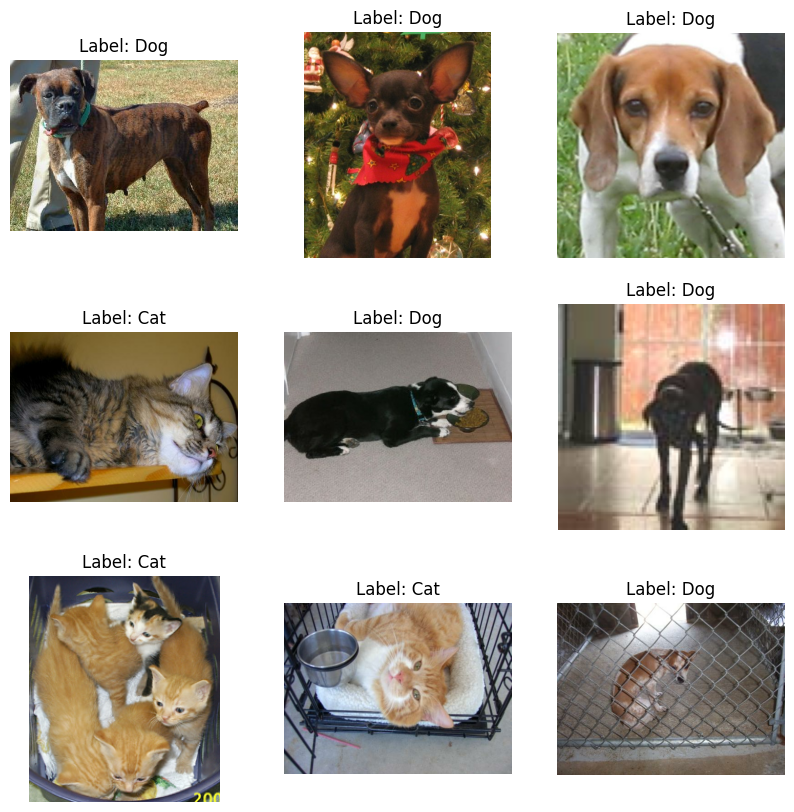

In [3]:
import matplotlib.pyplot as plt

# Function to show images with labels
def show_samples(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title('Label: ' + ('Cat' if label.numpy() == 0 else 'Dog'))
        plt.axis('off')

# Displaying training samples
show_samples(train_data)
plt.show()


We will see how amazing these neural networks are, and see how complicated these images are, but we don't need to worry about it, these neural networks will work like magic and classify dogs or cats.

# Step 3: Preprocess the Data
Perform necessary preprocessing steps like resizing, normalization, etc.
Example:

In [4]:
def preprocess_img(image, label):
    image = tf.image.resize(image, (256, 256))
    image = tf.cast(image, tf.float32) / 255.0  # Cast image to float32 and normalize
    return image, label

IMG_SIZE = 256  # Define the desired image size
train_data = train_data.map(preprocess_img).shuffle(1000).batch(32)
test_data = test_data.map(preprocess_img).batch(32)


# Step 4: Use the Dataset for Training or Testing

Setting up a CNN architecture to work on this:

In [5]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
582/582 [==============================] - 78s 106ms/step - loss: 1.1436 - accuracy: 0.6073 - val_loss: 0.6419 - val_accuracy: 0.6318
Epoch 2/10
582/582 [==============================] - 65s 110ms/step - loss: 0.5534 - accuracy: 0.7235 - val_loss: 0.5489 - val_accuracy: 0.7049
Epoch 3/10
582/582 [==============================] - 65s 110ms/step - loss: 0.4585 - accuracy: 0.7848 - val_loss: 0.4756 - val_accuracy: 0.7698
Epoch 4/10
582/582 [==============================] - 64s 106ms/step - loss: 0.4081 - accuracy: 0.8167 - val_loss: 0.5498 - val_accuracy: 0.7461
Epoch 5/10
582/582 [==============================] - 65s 110ms/step - loss: 0.3406 - accuracy: 0.8519 - val_loss: 0.5502 - val_accuracy: 0.7719
Epoch 6/10
582/582 [==============================] - 66s 111ms/step - loss: 0.2669 - accuracy: 0.8890 - val_loss: 0.5148 - val_accuracy: 0.7790
Epoch 7/10
582/582 [==============================] - 61s 103ms/step - loss: 0.1893 - accuracy: 0.9247 - val_loss: 0.5810 - val_ac

In [10]:
import matplotlib.pyplot as plt

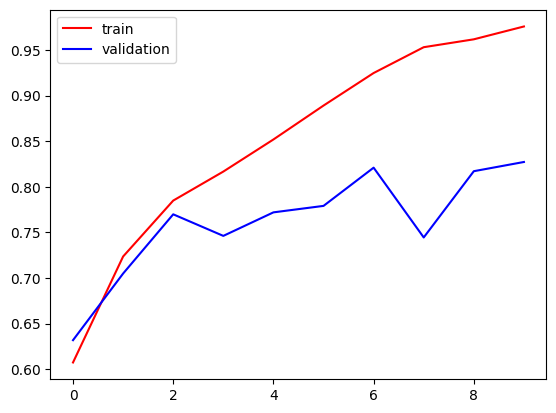

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

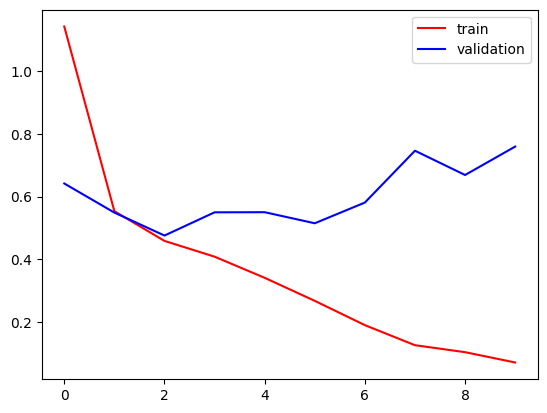

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [47]:
test_img = cv2.imread('cat2.jpg')

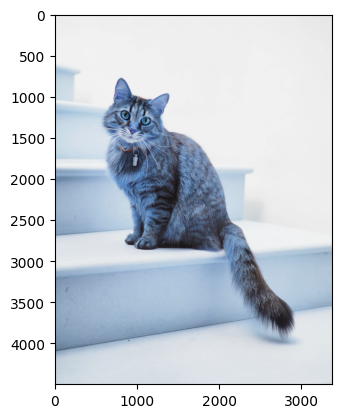

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(4498, 3374, 3)

In [50]:
test_img = cv2.resize(test_img,(256,256))

In [51]:
test_input = test_img.reshape((1,256,256,3))

In [52]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [71]:
test_img = cv2.imread('cat.jpg')

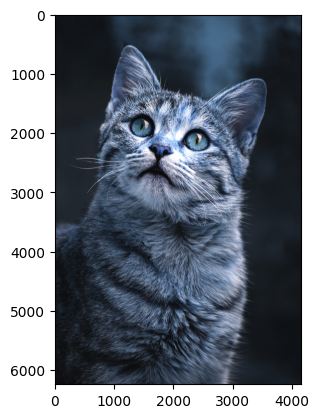

In [72]:
plt.imshow(test_img)

In [73]:
test_img.shape

(6240, 4160, 3)

In [74]:
test_img = cv2.resize(test_img,(256,256))

In [75]:
test_input = test_img.reshape((1,256,256,3))

In [76]:
model.predict(test_input)

1/1 [==============================] - 0s 33ms/step


array([[6.7717003e-26]], dtype=float32)